In [1]:
import pandas as pd
import numpy as np

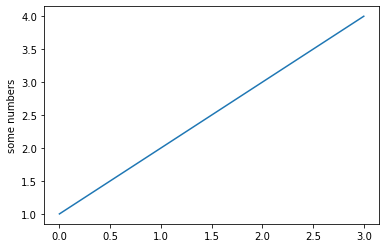

In [2]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

In [4]:
pd.set_option('display.notebook_repr_html', True)
def _repr_latex_(self):
    return "\centering{%s}" % self.to_latex()
pd.DataFrame._repr_latex_ = _repr_latex_

In [5]:
df_completo = pd.read_csv("covid19_casos_brasil.csv")
df_completo.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308.0,2020-02-25,9,12252023.0,False,False,1,0.00816,2020-02-25,0.0,0,1,city,SP,1,0
1,NaN,35.0,2020-02-25,9,45919049.0,False,False,1,0.00218,2020-02-25,0.0,0,1,state,SP,1,0
2,São Paulo,3550308.0,2020-02-26,9,12252023.0,False,False,1,0.00816,2020-02-26,0.0,0,2,city,SP,0,0
3,NaN,35.0,2020-02-26,9,45919049.0,False,False,1,0.00218,2020-02-26,0.0,0,2,state,SP,0,0
4,São Paulo,3550308.0,2020-02-27,9,12252023.0,False,False,1,0.00816,2020-02-27,0.0,0,3,city,SP,0,0


In [6]:
 print(df_completo.head(2))

        city  city_ibge_code        date  epidemiological_week  \
0  São Paulo       3550308.0  2020-02-25                     9   
1        NaN            35.0  2020-02-25                     9   

   estimated_population_2019  is_last  is_repeated  last_available_confirmed  \
0                 12252023.0    False        False                         1   
1                 45919049.0    False        False                         1   

   last_available_confirmed_per_100k_inhabitants last_available_date  \
0                                        0.00816          2020-02-25   
1                                        0.00218          2020-02-25   

   last_available_death_rate  last_available_deaths  order_for_place  \
0                        0.0                      0                1   
1                        0.0                      0                1   

  place_type state  new_confirmed  new_deaths  
0       city    SP              1           0  
1      state    SP            

In [7]:
cols = ['city', 'date', 'last_available_confirmed', 'last_available_deaths']
df_completo.head()[cols]

,city,date,last_available_confirmed,last_available_deaths
0,São Paulo,2020-02-25,1,0
1,NaN,2020-02-25,1,0
2,São Paulo,2020-02-26,1,0
3,NaN,2020-02-26,1,0
4,São Paulo,2020-02-27,1,0


In [9]:
filtro_cidade_DV = df_completo['city'] == 'Dois Vizinhos'
df_DV = df_completo[filtro_cidade_DV]
df_DV.tail()[cols]

,city,date,last_available_confirmed,last_available_deaths
330241,Dois Vizinhos,2020-07-08,16,0
335600,Dois Vizinhos,2020-07-09,16,0
340965,Dois Vizinhos,2020-07-10,17,0
346335,Dois Vizinhos,2020-07-11,17,0
351707,Dois Vizinhos,2020-07-12,17,0


In [10]:
 print(df_DV.columns)

Index(['city', 'city_ibge_code', 'date', 'epidemiological_week',
       'estimated_population_2019', 'is_last', 'is_repeated',
       'last_available_confirmed',
       'last_available_confirmed_per_100k_inhabitants', 'last_available_date',
       'last_available_death_rate', 'last_available_deaths', 'order_for_place',
       'place_type', 'state', 'new_confirmed', 'new_deaths'],
      dtype='object')


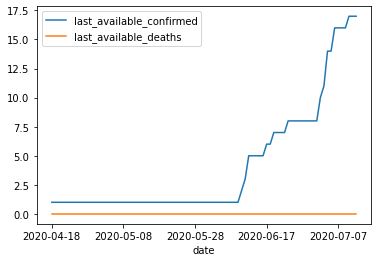

In [11]:
df_DV.plot('date', ['last_available_confirmed', 'last_available_deaths'])

In [16]:
filtro_estado_PR_10_julho = (df_completo['state'] == 'PR') & (df_completo['place_type'] == 'city') & (df_completo['date'] == '2020-07-10')
df_PR_1007 = df_completo[filtro_estado_PR_10_julho]
df_PR_1007.head()[cols]

,city,date,last_available_confirmed,last_available_deaths
340873,Abatiá,2020-07-10,52,0
340874,Adrianópolis,2020-07-10,57,2
340875,Agudos do Sul,2020-07-10,39,0
340876,Almirante Tamandaré,2020-07-10,336,4
340877,Altamira do Paraná,2020-07-10,1,0


In [17]:
 df_PR_1007[['estimated_population_2019',
             'last_available_confirmed',
             'last_available_deaths']].describe()

,estimated_population_2019,last_available_confirmed,last_available_deaths
count,3.790000e+02,380.000000,380.000000
mean,2.995080e+04,103.978947,2.573684
std,1.121534e+05,500.868564,12.833512
min,1.331000e+03,0.000000,0.000000
25%,5.279000e+03,7.750000,0.000000
50%,1.047200e+04,19.000000,0.000000
75%,1.929050e+04,56.000000,1.000000
max,1.933105e+06,8431.000000,210.000000


In [19]:
df_DV_1007 = df_DV[df_DV['date'] == '2020-07-10']
df_DV_1007[['estimated_population_2019',
            'last_available_confirmed',
            'last_available_deaths']]

,estimated_population_2019,last_available_confirmed,last_available_deaths
340965,40641.0,17,0


In [20]:
df_CT_1007 = df_PR_1007[df_PR_1007['city'] == 'Curitiba']

In [21]:
df_selecionadas_1007 = pd.concat([df_DV_1007, df_CT_1007])
df_selecionadas_1007[cols]

,city,date,last_available_confirmed,last_available_deaths
340965,Dois Vizinhos,2020-07-10,17,0
340958,Curitiba,2020-07-10,8431,210


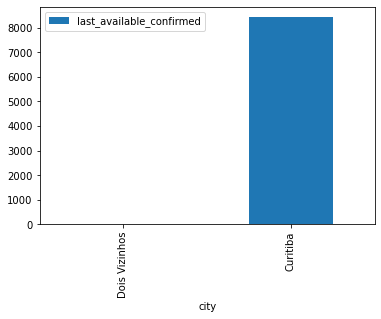

In [22]:
 df_selecionadas_1007.plot.bar('city', 'last_available_confirmed')

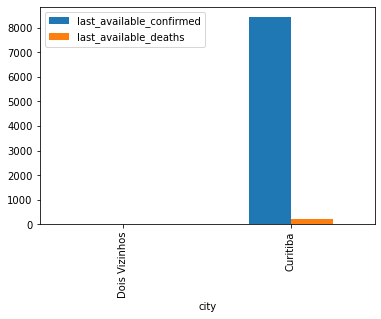

In [24]:
df_selecionadas_1007.plot.bar('city', ['last_available_confirmed',
'last_available_deaths'])

In [26]:
cidades = ['Dois Vizinhos',
           'Curitiba',
           'Ponta Grossa',
           'Pato Branco',
           'Londrina']
frames = list()
for c in cidades:
    frames.append(df_PR_1007[df_PR_1007['city'] == c])
df_selecionadas_1007 = pd.concat(frames)
df_selecionadas_1007.head()[cols]

,city,date,last_available_confirmed,last_available_deaths
340965,Dois Vizinhos,2020-07-10,17,0
340958,Curitiba,2020-07-10,8431,210
341133,Ponta Grossa,2020-07-10,545,3
341118,Pato Branco,2020-07-10,206,1
341055,Londrina,2020-07-10,1873,92


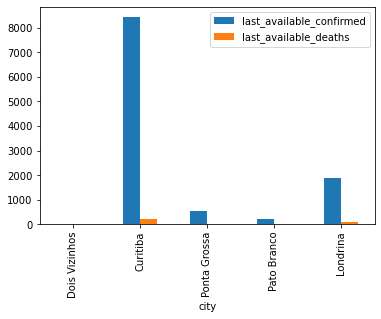

In [27]:
df_selecionadas_1007.plot.bar('city', ['last_available_confirmed',
'last_available_deaths'])

In [28]:
filtro_estados = (df_completo['place_type'] == 'state')
df_estados = df_completo[filtro_estados]
df_estados.head()[cols]

,city,date,last_available_confirmed,last_available_deaths
1,NaN,2020-02-25,1,0
3,NaN,2020-02-26,1,0
5,NaN,2020-02-27,1,0
7,NaN,2020-02-28,2,0
9,NaN,2020-02-29,2,0


In [29]:
df_pivo_estado = df_estados.pivot(index='date',
                                  columns='state',
                                  values='last_available_confirmed')
df_pivo_estado.iloc[:10, :5] 

state,AC,AL,AM,AP,BA
date,,,,,
2020-02-25,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN,NaN,NaN
2020-02-27,NaN,NaN,NaN,NaN,NaN
2020-02-28,NaN,NaN,NaN,NaN,NaN
2020-02-29,NaN,NaN,NaN,NaN,NaN
2020-03-01,NaN,NaN,NaN,NaN,NaN
2020-03-02,NaN,NaN,NaN,NaN,NaN
2020-03-03,NaN,NaN,NaN,NaN,NaN
2020-03-04,NaN,NaN,NaN,NaN,NaN


In [30]:
df_pivo_estado.iloc[-10:, :5]

state,AC,AL,AM,AP,BA
date,,,,,
2020-07-03,14112.0,38404.0,74537.0,29574.0,82314.0
2020-07-04,14487.0,39255.0,75502.0,29809.0,85485.0
2020-07-05,14622.0,39935.0,76014.0,29883.0,87048.0
2020-07-06,14688.0,40569.0,76427.0,30004.0,88279.0
2020-07-07,14941.0,41524.0,79167.0,30294.0,91954.0
2020-07-08,15167.0,42322.0,80082.0,30524.0,95536.0
2020-07-09,15465.0,43191.0,81318.0,30763.0,98319.0
2020-07-10,15768.0,43959.0,82507.0,31080.0,101186.0
2020-07-11,16080.0,44633.0,83230.0,31279.0,104188.0


In [31]:
df_pivo_estado.iloc[-10:, 10:15]

state,MG,MS,MT,PA,PB
date,,,,,
2020-07-03,53351.0,9910.0,19540.0,112531.0,50765.0
2020-07-04,55958.0,10089.0,20333.0,113811.0,52306.0
2020-07-05,58283.0,10253.0,21081.0,114535.0,52728.0
2020-07-06,59626.0,10687.0,22078.0,116152.0,53151.0
2020-07-07,60897.0,11063.0,23506.0,118744.0,54802.0
2020-07-08,64035.0,11671.0,24804.0,120731.0,56344.0
2020-07-09,66864.0,12261.0,26396.0,122674.0,57614.0
2020-07-10,70086.0,12969.0,27636.0,124934.0,59118.0
2020-07-11,73813.0,13197.0,27636.0,125714.0,60421.0


In [32]:
df_pivo_estado.index

Index(['2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
       '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       ...
       '2020-07-03', '2020-07-04', '2020-07-05', '2020-07-06', '2020-07-07',
       '2020-07-08', '2020-07-09', '2020-07-10', '2020-07-11', '2020-07-12'],
      dtype='object', name='date', length=139)

In [33]:
df_pivo_estado.columns

Index(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS',
       'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC',
       'SE', 'SP', 'TO'],
      dtype='object', name='state')

In [34]:
df_pivo_estado = df_pivo_estado.fillna(0)
df_pivo_estado.iloc[:10, -5:]

state,RS,SC,SE,SP,TO
date,,,,,
2020-02-25,0.0,0.0,0.0,1.0,0.0
2020-02-26,0.0,0.0,0.0,1.0,0.0
2020-02-27,0.0,0.0,0.0,1.0,0.0
2020-02-28,0.0,0.0,0.0,2.0,0.0
2020-02-29,0.0,0.0,0.0,2.0,0.0
2020-03-01,0.0,0.0,0.0,2.0,0.0
2020-03-02,0.0,0.0,0.0,2.0,0.0
2020-03-03,0.0,0.0,0.0,2.0,0.0
2020-03-04,0.0,0.0,0.0,3.0,0.0


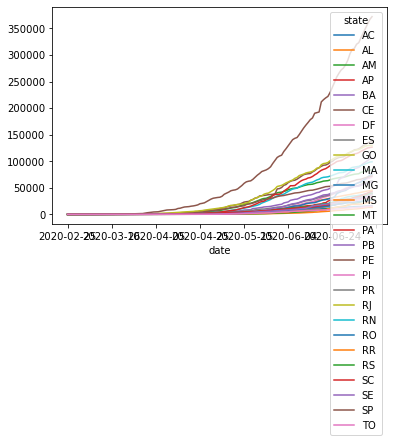

In [35]:
df_pivo_estado.plot()

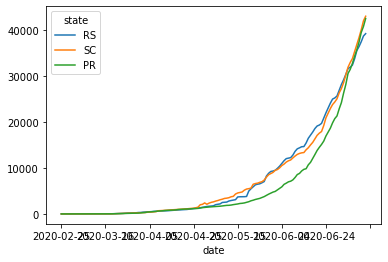

In [36]:
df_pivo_estado.plot(None, ['RS', 'SC', 'PR'])

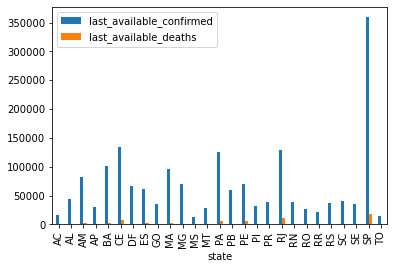

In [37]:
filtro_data_estado = df_estados['date'] == '2020-07-10'
df_estados_1007 = df_estados[filtro_data_estado]
df_estados_1007.plot.bar('state', ['last_available_confirmed', 'last_available_deaths'])